# Dataset Health
## Farhan Nafis Rayhan - 13522037
## Edbert Eddyson Gunawan - 13522039


## Setup Dataset

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import seaborn as sns
from scipy.stats import t, norm, binom
import math

In [8]:
main_df = pd.read_csv('health.csv')
main_df.head()

,Unnamed: 0,Age,Income,Gender,Education,Stress_Level,Exercise_Hours_Per_Week,Cholesterol_Level,Weight,Height,Blood_Pressure,Health_Status
0,0,50,3.093457e+06,Male,Bachelor's Degree,4.967887,16.632494,200.419036,70.917032,150.401537,125.568820,Excellent
1,1,44,5.545445e+06,Male,Bachelor's Degree,5.833649,13.255988,201.010046,70.669576,149.285349,125.603505,Fair
2,2,25,4.401808e+06,Male,Master's Degree,5.587946,11.144370,200.105258,67.464506,150.020695,127.093163,Excellent
3,3,41,4.606865e+06,Female,High School,6.271119,9.140268,199.648701,67.566598,150.360963,117.388100,Poor
4,4,24,6.956049e+06,Male,Bachelor's Degree,5.895226,9.775610,199.330152,79.601530,149.730525,114.163706,Fair


In [5]:
main_df.describe()

,Unnamed: 0,Age,Income,Stress_Level,Exercise_Hours_Per_Week,Cholesterol_Level,Weight,Height,Blood_Pressure
count,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,39.417500,4.889928e+06,5.356912,9.951842,200.223191,70.234359,150.730565,119.682437
std,577.494589,11.560753,2.010795e+06,0.917069,4.909573,0.972594,10.174343,0.680443,11.201412
min,0.000000,20.000000,-1.088987e+06,2.528057,-4.499310,196.914948,32.581758,149.124594,0.000000
25%,499.750000,30.000000,3.580714e+06,4.737650,6.654951,199.581975,63.654894,150.240019,113.048602
50%,999.500000,39.000000,4.898901e+06,5.351795,9.927028,200.221522,70.392125,150.663619,119.937396
75%,1499.250000,49.250000,6.271595e+06,6.003014,13.232218,200.873647,76.894512,151.140489,126.608781
max,1999.000000,59.000000,1.222749e+07,8.581327,26.816358,203.162335,109.609562,153.870469,200.950000


In [6]:
main_df.dtypes

Unnamed: 0                   int64
Age                          int64
Income                     float64
Gender                      object
Education                   object
Stress_Level               float64
Exercise_Hours_Per_Week    float64
Cholesterol_Level          float64
Weight                     float64
Height                     float64
Blood_Pressure             float64
Health_Status               object
dtype: object

## **0. Data Cleansing**
sebelum membuat deskripsi statistika dll, diperlukan tahapan untuk memastikan seluruh baris pada data "bersih". Hal-hal yang perlu dibersihkan antaralain:

- _undefined_ pada suatu kolom
- _negative_ pada kolom yang tidak mungkin bernilai negatif
- 0 pada kolom yang tidak mungkin bernilai 0

In [7]:
for x in main_df.columns:
    print(x)
    print(np.sort(main_df[x].unique()))
    print()

Unnamed: 0
[   0    1    2 ... 1997 1998 1999]

Age
[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]

Income
[-1088986.52640496  -967729.12542885  -637266.33760628 ...
 10734123.42989345 11988906.87047028 12227492.23      ]

Gender
['Female' 'Male']

Education
["Bachelor's Degree" 'High School' "Master's Degree" 'Other' 'PhD'
 'undefined']

Stress_Level
[2.52805661 2.66176402 2.68630775 ... 8.16888453 8.1915708  8.58132717]

Exercise_Hours_Per_Week
[-4.4993105  -4.29896855 -4.24773278 ... 25.53054266 26.79592615
 26.81635847]

Cholesterol_Level
[196.91494771 197.00949963 197.02829761 ... 202.92126853 202.94200095
 203.162335  ]

Weight
[ 32.58175761  38.02248115  38.66654656 ... 102.70816714 103.48818192
 109.60956203]

Height
[149.12459377 149.14376408 149.22506075 ... 153.4943848  153.84377719
 153.87046895]

Blood_Pressure
[  0.          10.78        44.45       ... 152.64347569 154.42765622
 200.95      ]

He

Dari proses sebelumnya didapatkan bahwa terdapat beberapa kolom yang memiliki permasalahan seperti
- Income - bernilai negatif
- Education - undefined
- Excersice Hour Per Week - negative value
- Blood Pressure - bernilai 0

maka dari itu, akan dilakukan data cleansing terlebih dahulu untuk mendapatkan nilai kuartil baru yang lebih akurat, yang kemudian akan digunakan untuk membuang outlier.

In [8]:
main_df.shape

(2000, 12)

In [9]:
temp_df = main_df.where(main_df['Income'] >= 0)
temp_df = temp_df.where(temp_df['Education'] != "undefined")
temp_df = temp_df.where(temp_df['Exercise_Hours_Per_Week'] >= 0)
temp_df = temp_df.where(temp_df['Blood_Pressure'] > 0)

clean_df = temp_df.dropna()
clean_df

,Unnamed: 0,Age,Income,Gender,Education,Stress_Level,Exercise_Hours_Per_Week,Cholesterol_Level,Weight,Height,Blood_Pressure,Health_Status
0,0.0,50.0,3.093457e+06,Male,Bachelor's Degree,4.967887,16.632494,200.419036,70.917032,150.401537,125.568820,Excellent
1,1.0,44.0,5.545445e+06,Male,Bachelor's Degree,5.833649,13.255988,201.010046,70.669576,149.285349,125.603505,Fair
2,2.0,25.0,4.401808e+06,Male,Master's Degree,5.587946,11.144370,200.105258,67.464506,150.020695,127.093163,Excellent
3,3.0,41.0,4.606865e+06,Female,High School,6.271119,9.140268,199.648701,67.566598,150.360963,117.388100,Poor
4,4.0,24.0,6.956049e+06,Male,Bachelor's Degree,5.895226,9.775610,199.330152,79.601530,149.730525,114.163706,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995.0,22.0,2.072546e+06,Male,Master's Degree,5.356903,14.428793,200.696341,49.569958,150.114380,113.658773,Fair
1996,1996.0,25.0,7.456909e+06,Female,Master's Degree,5.499054,5.349180,198.991264,73.592521,149.828511,107.860829,Excellent
1997,1997.0,44.0,5.560391e+06,Male,PhD,7.034253,3.746812,200.576659,44.493272,150.587193,138.210854,Poor
1998,1998.0,20.0,3.436759e+06,Male,Bachelor's Degree,5.690408,5.720289,200.206448,85.255918,150.825614,127.516222,Good


Setelah _data cleansing_ didapatkan bahwa dari 2000 baris, hanya dibuang 63 baris, **3.15%** dari keseluruhan dataset, sehingga tidak apa jika data-data yang salah dibuang

## **1. Deskripsi statistika**

Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data. Data yang bersifat numerik dapat diberikan nilai mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Data dalam bentuk string dapat dicari unique values, dan proporsi nya.


### Fungsi Buatan

In [3]:
def getMean(column: pd.core.series.Series):
  if(column.dtypes != 'O'):
    return sum(column) / len(column)

def getMedian(column: pd.core.series.Series):
  if(column.dtypes != 'O'):
    column = column.sort_values()
    mid = column.size // 2

    if column.size % 2 == 0:
      return (column.iloc[mid-1] + column.iloc[mid]) / 2

    return column[mid]

def getModus(column: pd.core.series.Series):
  dictionary_element = {}
  for x in column:
    if x in dictionary_element:
      dictionary_element[x] += 1
    else:
      dictionary_element.setdefault(x, 1)
  # print(column.mode())
  return max(dictionary_element, key=lambda k: dictionary_element[k])

def getStd(column: pd.core.series.Series):
  std_dev = getVariance(column) ** 0.5
  return std_dev

def getVariance(column: pd.core.series.Series):
  mean_val = getMean(column)
  squared_diff = [(x - mean_val) ** 2 for x in column]
  variance = sum(squared_diff) / len(column)
  return variance

def getRange(column: pd.core.series.Series):
  return getMax(column) - getMin(column)

def getMax(column: pd.core.series.Series):
  return max(column)

def getMin(column: pd.core.series.Series):
  return min(column)

def getKuartil(column: pd.core.series.Series):
  column = column.sort_values()

  q2 = getMedian(column)
  lower_half = [x for x in column if x < q2]
  upper_half = [x for x in column if x > q2]
  lower_half = pd.Series(lower_half)
  upper_half = pd.Series(upper_half)
  q1 = getMedian(lower_half)
  q3 = getMedian(upper_half)
  return [q1, q2, q3]

def getInterKuartil(column: pd.core.series.Series):
  quartile = getKuartil(column)
  return quartile[2] - quartile[0]

def getSkewness(column: pd.core.series.Series):
  return sum((x - getMean(column)) ** 3 for x in column) / (len(column) * getStd(column) ** 3)

def kurtosis(column: pd.core.series.Series):
  return sum((x - getMean(column)) ** 4 for x in column) / (len(column) * getStd(column) ** 4) - 3

def getUnique(column: pd.core.series.Series):
  unique_set = set()
  for x in column:
    unique_set.add(x)
  return unique_set

def getProportion(column: pd.core.series.Series):
  dictionary_element = {}
  for x in column:
    if x in dictionary_element:
      dictionary_element[x] += 1
    else:
      dictionary_element.setdefault(x, 1)

  sum_val = sum(dictionary_element.values())
  for x in dictionary_element:
    dictionary_element[x] /= sum_val

  return dictionary_element

def showInfo(column: pd.core.series.Series):
  if(column.dtypes != 'O'):
    x = getMean(column)
    print("Rata-rata: " + str(x))
    x = getMedian(column)
    print("Median: " + str(x))
    x = getModus(column)
    print("Modus: " + str(x))
    x = getStd(column)
    print("Standar Deviasi: " + str(x))
    x = getVariance(main_df['Age'])
    print("Variansi: " + str(x))
    x = getRange(column)
    print("Range: " + str(x))
    x = getMin(column)
    print("Nilai Minimum: " + str(x))
    x = getMax(column)
    print("Nilai Maksimum: " + str(x))
    x = getKuartil(column)
    print("Kuartil: " + str(x))
    x = getInterKuartil(column)
    print("Inter Kuartil: " + str(x))
    x = getSkewness(column)
    print("Skewness: " + str(x))
    x = kurtosis(column)
    print("Kurtosis: " + str(x))
  else:
    x = getUnique(column)
    print("Unique values: " + str(x))
    x = getProportion(column)
    print("proportion:")
    print(x)

In [44]:
# list of string columns
string_columns = clean_df.select_dtypes(include=['object']).columns

for x in string_columns:
    print(x)
    print(clean_df[x].unique())
    print(getProportion(clean_df[x]))
    print()



Gender
['Male' 'Female']
{'Male': 0.4940629839958699, 'Female': 0.5059370160041301}

Education
["Bachelor's Degree" "Master's Degree" 'High School' 'PhD' 'Other']
{"Bachelor's Degree": 0.47186370676303563, "Master's Degree": 0.24574083634486318, 'High School': 0.13216313887454828, 'PhD': 0.12287041817243159, 'Other': 0.027361899845121322}

Health_Status
['Excellent' 'Fair' 'Poor' 'Good']
{'Excellent': 0.2550335570469799, 'Fair': 0.2591636551368095, 'Poor': 0.2514197212183789, 'Good': 0.2343830665978317}



In [41]:
# list of numerical columns
numerical_columns = clean_df.columns.difference(string_columns)

numerical_columns_df = clean_df[numerical_columns].describe()

numerical_columns_df.loc['median'] = clean_df[numerical_columns].median()
numerical_columns_df.loc['modus'] = clean_df[numerical_columns].mode().loc[0]
numerical_columns_df.loc['variance'] = clean_df[numerical_columns].var()
numerical_columns_df.loc['iqr'] = numerical_columns_df.loc['75%'] - numerical_columns_df.loc['25%']
numerical_columns_df.loc['skewness'] = clean_df[numerical_columns].skew()
numerical_columns_df.loc['kurtosis'] = clean_df[numerical_columns].kurtosis()
numerical_columns_df.loc['range'] = numerical_columns_df.loc['max'] - numerical_columns_df.loc['min']


new_idx = ['count', 'mean', 'median', 'modus', 'std', 'variance', 'range', 'min', 'max', 'range', '25%', '50%', '75%', 'iqr', 'skewness', 'kurtosis']
numerical_columns_df = numerical_columns_df.reindex(new_idx)

numerical_columns_df

,Age,Blood_Pressure,Cholesterol_Level,Exercise_Hours_Per_Week,Height,Income,Stress_Level,Unnamed: 0,Weight
count,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1.937000e+03,1937.000000,1937.000000,1937.000000
mean,39.404750,119.849171,200.221227,10.198466,150.733023,4.925002e+06,5.360519,1002.130614,70.237876
median,39.000000,120.082637,200.219447,10.039518,150.665062,4.901045e+06,5.355749,1001.000000,70.371063
modus,20.000000,10.780000,196.914948,0.022518,149.124594,7.554092e+02,2.528057,0.000000,32.581758
std,11.563619,10.588517,0.975617,4.674551,0.684895,1.960694e+06,0.918790,576.189896,10.151861
variance,133.717291,112.116697,0.951828,21.851426,0.469081,3.844321e+12,0.844174,331994.796464,103.060274
range,39.000000,190.170000,6.247387,26.793841,4.745875,1.222674e+07,6.053271,1999.000000,77.027804
min,20.000000,10.780000,196.914948,0.022518,149.124594,7.554092e+02,2.528057,0.000000,32.581758
max,59.000000,200.950000,203.162335,26.816358,153.870469,1.222749e+07,8.581327,1999.000000,109.609562
range,39.000000,190.170000,6.247387,26.793841,4.745875,1.222674e+07,6.053271,1999.000000,77.027804


## **2. Outlier**
Apakah pada data tersebut terdapat outlier? Jika ya, dapatkah anda menanganinya? Jelaskan apa yang umumnya dilakukan untuk menangani outlier.

## **3. Visualisasi Plot Distribusi**
Membuat Visualisasi plot distribusi. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut. Jika numerik dapat dibuat dalam bentuk histogram dan box plot, dan jika string dengan histogram.

In [63]:
def distribution_plot(column: pd.core.series.Series):
    # create a new figure with two subplots

    if(column.dtypes == 'object'):
        fig, ax1 = plt.subplots(ncols=1, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

    # plot the histogram of the data
    sns.histplot(column, ax=ax1)
    ax1.set_title("Histogram")
    ax1.set_ylabel("frequency")
    ax1.set_xlabel("value")

    if(column.dtypes != 'object'):
        # plot the boxplot on the second subplot
        ax2.boxplot(column, vert=True, widths=0.5, patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'), medianprops=dict(color='red'))
        ax2.set_title('Boxplot')
        ax2.set_xlabel('value')
        ax2.yaxis.tick_right()

        # display the plot
        plt.suptitle(column.name)
        plt.show()

### 1. Age

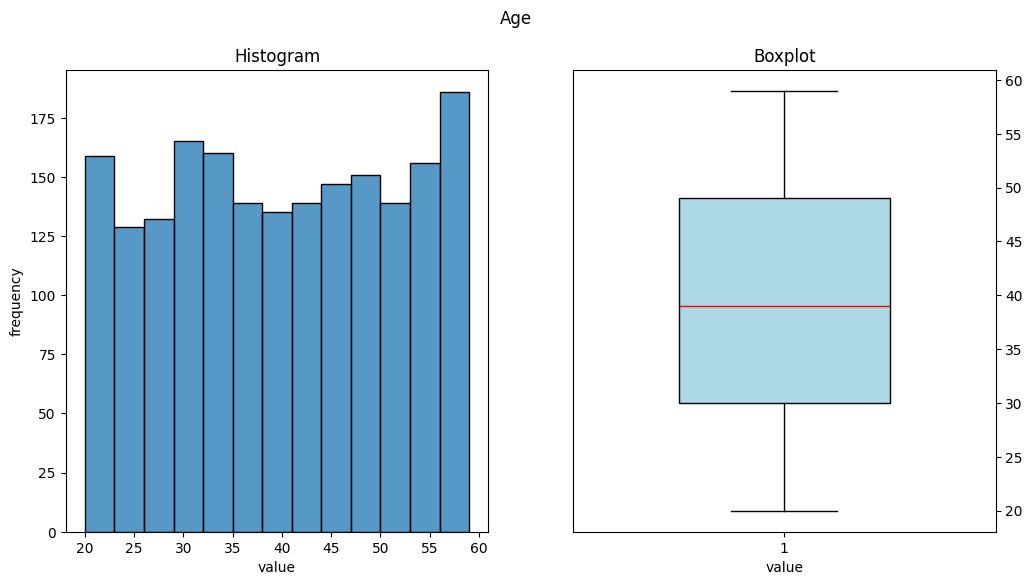

In [64]:
distribution_plot(clean_df['Age'])

### 2. Blood Pressure

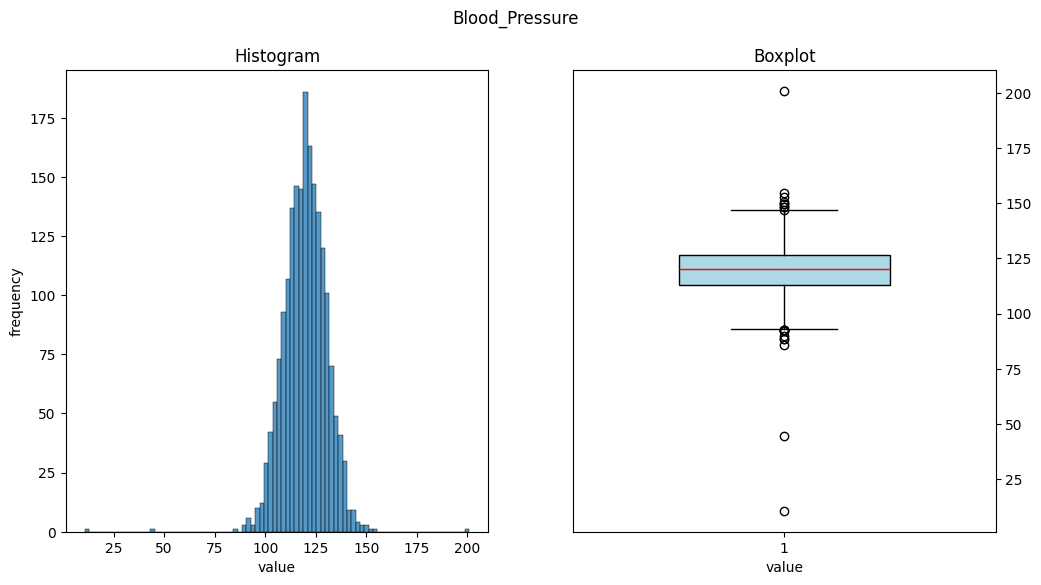

In [65]:
distribution_plot(clean_df['Blood_Pressure'])

### 3. Cholesterol Level

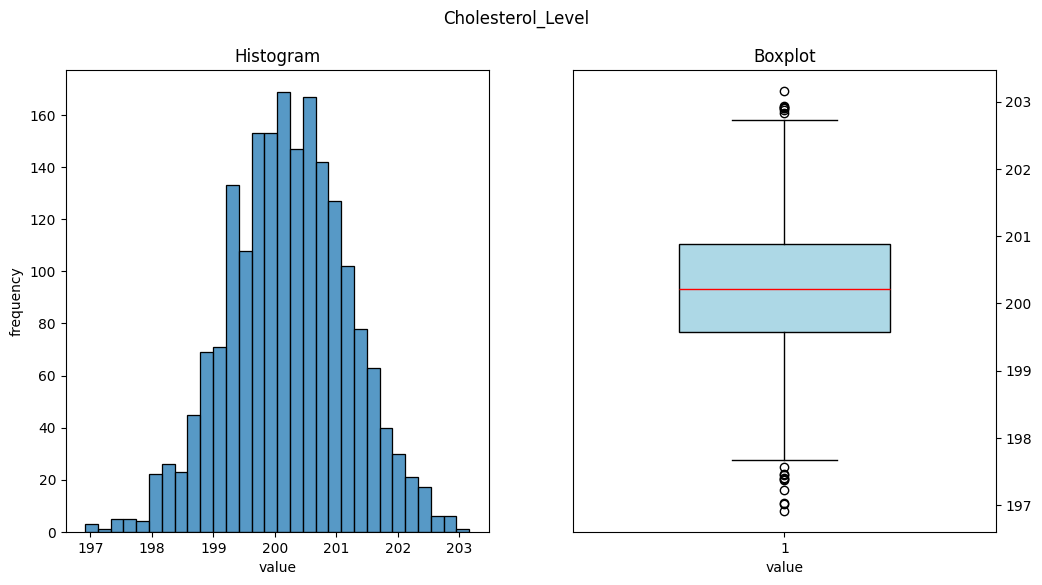

In [66]:
distribution_plot(clean_df['Cholesterol_Level'])

### 4. Education

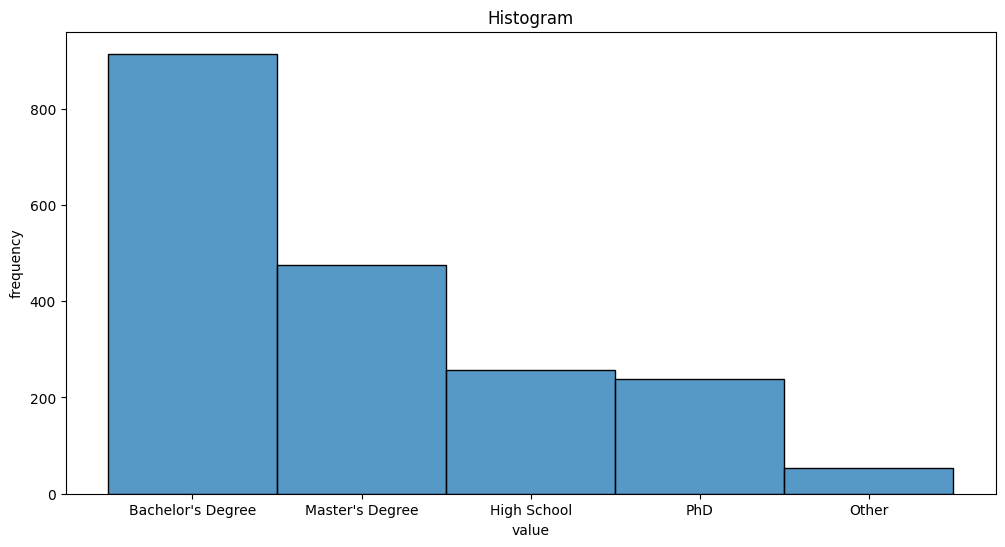

In [67]:
distribution_plot(clean_df['Education'])

### 5. Exercise Hours Per Week

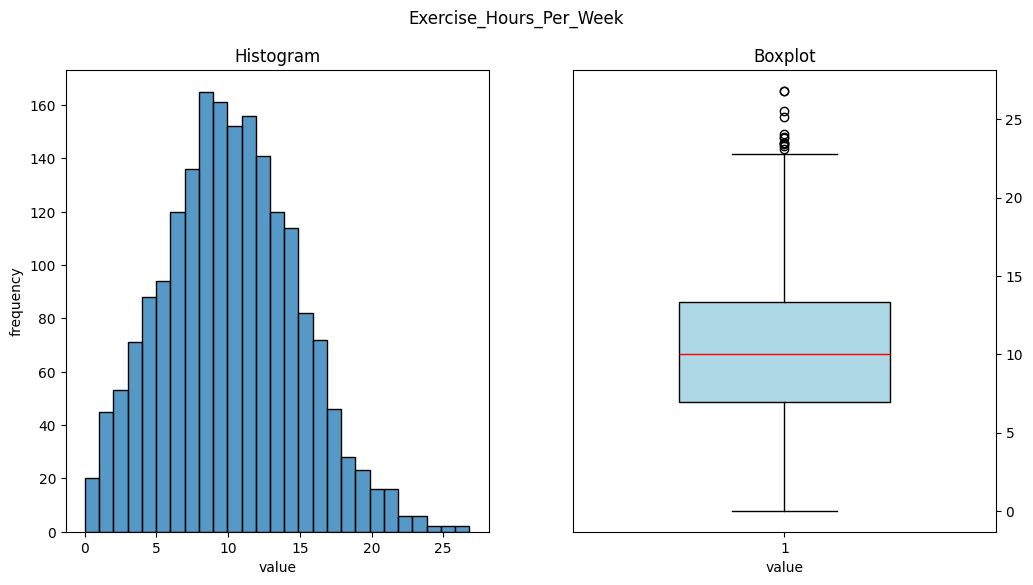

In [68]:
distribution_plot(clean_df['Exercise_Hours_Per_Week'])

### 6. Gender

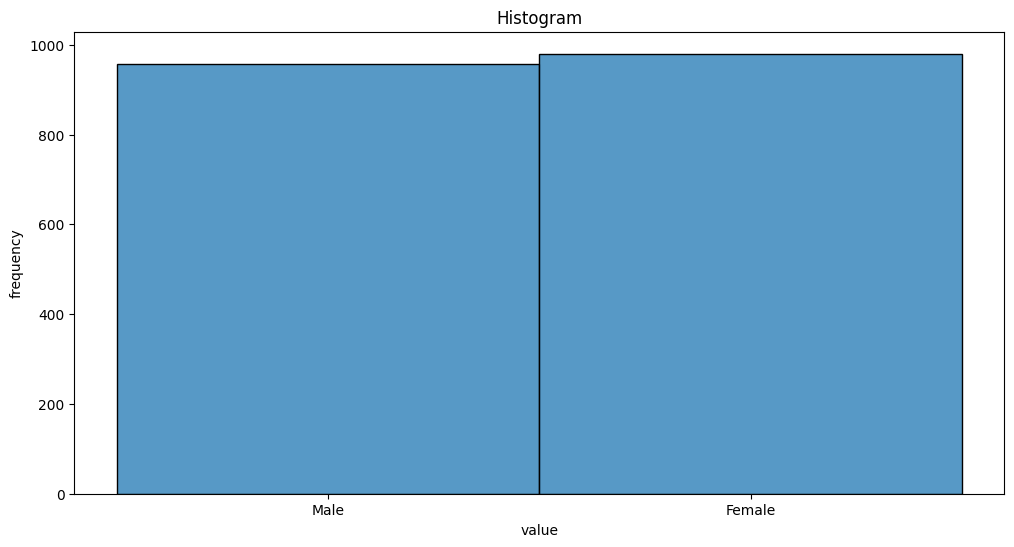

In [69]:
distribution_plot(clean_df['Gender'])

### 7. Health Status

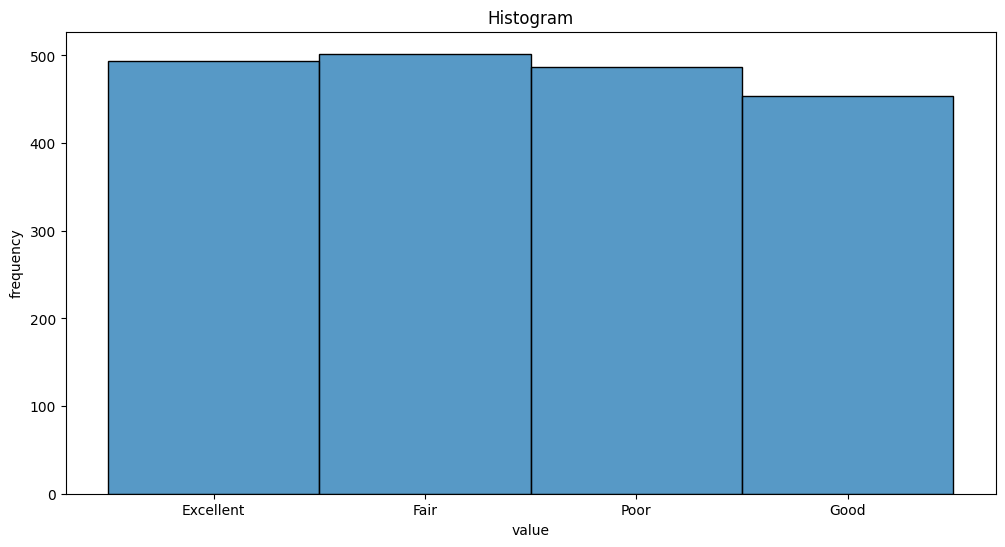

In [70]:
distribution_plot(clean_df['Health_Status'])

### 8. Height

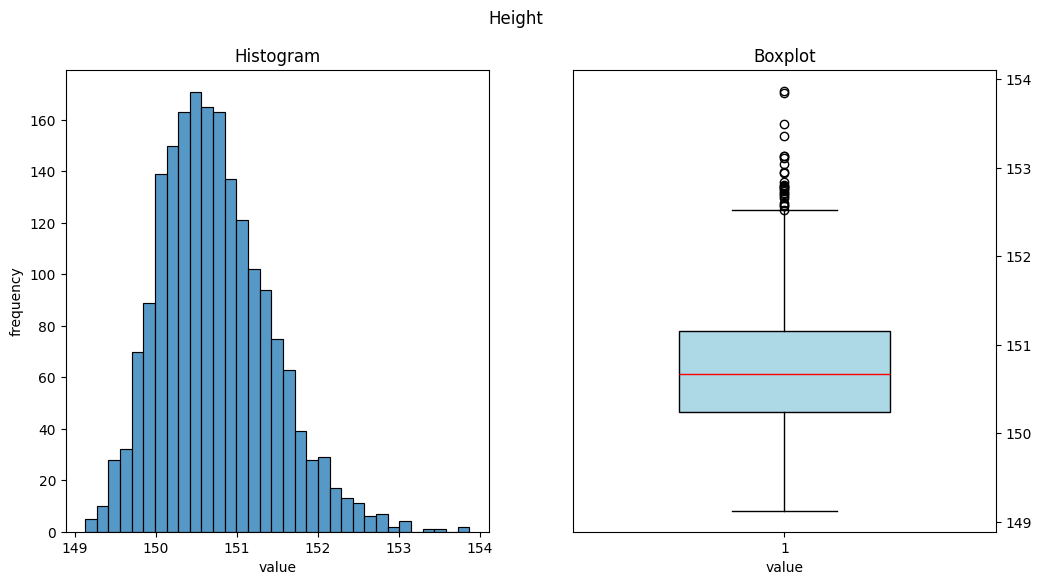

In [71]:
distribution_plot(clean_df['Height'])

### 9. Income

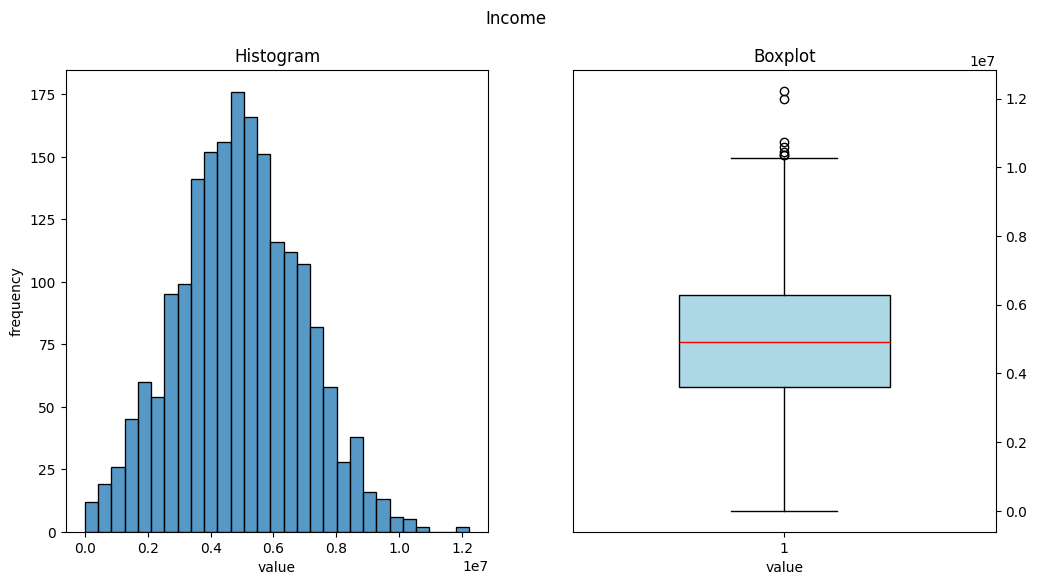

In [72]:
distribution_plot(clean_df['Income'])

### 10. Stress Level

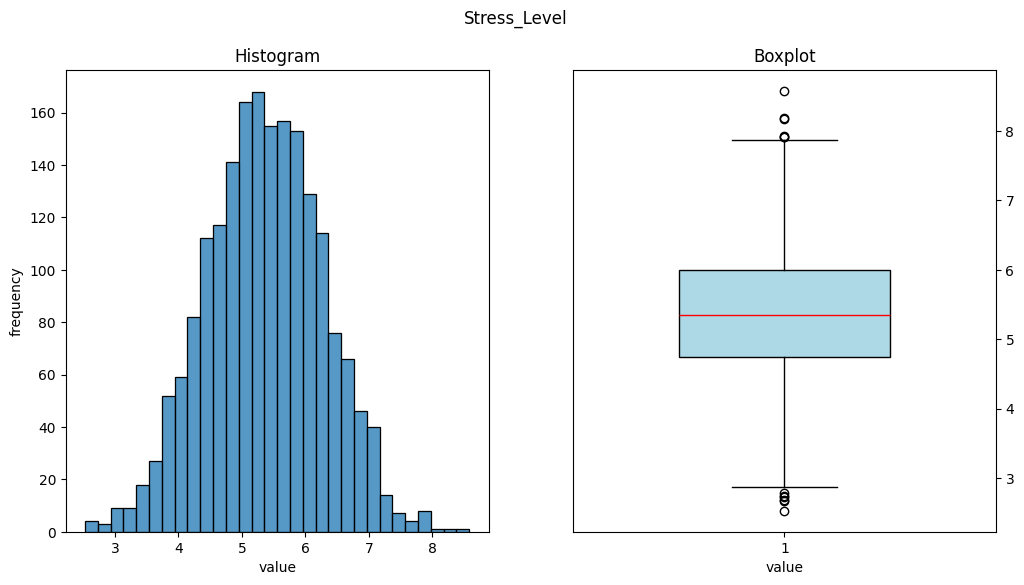

In [73]:
distribution_plot(clean_df['Stress_Level'])

### 11. Weight

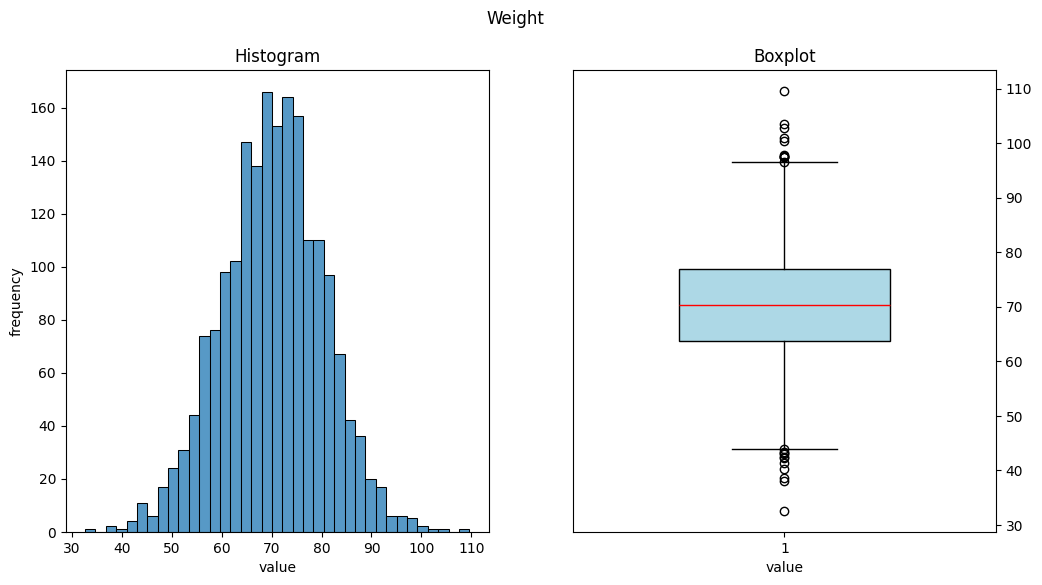

In [74]:
distribution_plot(clean_df['Weight'])

## **4. Menentukan Distribusi**
Menentukan distribusi setiap kolom numerik menggunakan hasil visualisasi histogram. Apakah kolom tersebut berdistribusi normal? Jika bukan, terdistribusi seperti apa kolom tersebut?


# **Permasalahan Analisis**
Mira adalah seorang peneliti kesehatan yang bekerja di sebuah lembaga riset medis yang terkemuka. Sebagai bagian dari tugasnya, Mira memiliki akses ke sebuah dataset yang berisi informasi tentang profil kesehatan dan gaya hidup dari sejumlah individu. Mira bertanggung jawab untuk melakukan analisis statistika terhadap dataset ini guna mendapatkan pemahaman yang lebih baik tentang faktor-faktor yang mempengaruhi kesehatan dan kualitas hidup individu. Selain itu, Mira juga diminta untuk mengidentifikasi pola dan hubungan yang signifikan antara variabel-variabel tersebut, serta untuk menjawab berbagai pertanyaan penelitian yang diajukan oleh lembaga riset.

Atribut: Age, Income, Gender, Education, Stress_Level, Exercise_Hours_Per_Week, Cholesterol_Level, Weight,Height, Blood_Pressure, Health_Status

Gunakan alpha = 0.05

## **5. Hipotesis 1 sampel**

### Soal 1
Lembaga riset saat ini sedang mempertanyakan data berat badan individu yang disimpan untuk kepentingan riset lanjutan. Identifikasilah apakah rata-rata berat badan pasien diatas 65 kg?

### Hipotesis
#### 1. H<sub>0</sub> : &mu; = 65
#### 2. H<sub>1</sub> : &mu; > 65

Uji t digunakan karena variansi populasi (&sigma;<sup>2</sup>) tidak diketahui.

In [4]:
n = len(clean_df['Weight'])
v = n-1
alpha = 0.05
critical_value = f.ppf(alpha, v)

x_bar = getMean(clean_df['Weight'])
mu_zero = 65
s = getStd(clean_df['Weight'])
t = (x_bar - mu_zero) / (s / math.sqrt(n))

p_value = norm.sf(abs(t))

print(f"t statistic is {t}")
print(f"Critical Value is {critical_value}")
print(f"p-value is {p_value}")
if t > critical_value:
    print("t statistic > t critical")
    print("H0 is rejected")
else:
    print("t statistic < t critical")
    print("H0 is accepted")

NameError: name 'clean_df' is not defined

### Soal 2
Tekanan darah sistole yang normal berada pada rentang 120 mmHg. Lembaga riset
perlu untuk memastikan apakah data individu yang diukur cukup normal. Periksalah
apakah rata-rata tekanan darah sistole bernilai 120 mmHg?

### Hipotesis
#### 1. H<sub>0</sub> : &mu; = 120
#### 2. H<sub>1</sub> : &mu; $\neq$ 120

Uji t digunakan karena variansi populasi (&sigma;<sup>2</sup>) tidak diketahui.

In [ ]:
n = len(clean_df['Blood_Pressure'])
v = n-1
alpha = 0.05
critical_value = f.ppf(alpha/2, v)

x_bar = getMean(clean_df['Blood_Pressure'])
mu_zero = 120
s = getStd(clean_df['Blood_Pressure'])
t = (x_bar - mu_zero) / (s / math.sqrt(n))

p_value = norm.sf(abs(t))

print(f"t statistic is {t}")
print(f"Critical Value is {critical_value}")
print(f"p-value is {p_value}")
if t > critical_value or t < 0 - critical_value:
    print("t statistic > t critical")
    print("H0 is rejected")
else:
    print("t statistic < t critical")
    print("H0 is accepted")

### Soal 3
Periksalah apakah data 200 individu pertama pengujian (baris teratas) memiliki rata-rata
waktu olahraga per minggu tidak sama dengan 15 jam?

### Hipotesis
#### 1. H<sub>0</sub> : &mu; = 15
#### 2. H<sub>1</sub> : &mu; $\neq$ 15

Uji t digunakan karena variansi populasi (&sigma;<sup>2</sup>) tidak diketahui.

In [ ]:
selected_data = clean_df[:200]

n = len(selected_data['Exercise_Hours_Per_Week'])
v = n-1
alpha = 0.05
critical_value = f.ppf(alpha/2, v)

x_bar = getMean(selected_data['Exercise_Hours_Per_Week'])
mu_zero = 15
s = getStd(selected_data['Exercise_Hours_Per_Week'])
t = (x_bar - mu_zero) / (s / math.sqrt(n))

p_value = norm.sf(abs(t))

print(f"t statistic is {t}")
print(f"Critical Value is {critical_value}")
print(f"p-value is {p_value}")
if t > critical_value or t < 0 - critical_value:
    print("t statistic > t critical")
    print("H0 is rejected")
else:
    print("t statistic < t critical")
    print("H0 is accepted")

### Soal 4
Apakah penduduk dengan pendapatan yang lebih besar dari Rp 7.500.000,00 tidak
sama dengan 30% dari data keseluruhan individu?

### Hipotesis
#### 1. H<sub>0</sub> : p = 0.3
#### 2. H<sub>1</sub> : p $\neq$ 0.3

Digunakan uji statistik binomial karena kolom income merupakan aproksimasi distribusi normal

In [14]:
alpha = 0.05
p0 = 0.3
n = len(clean_df['Income'])
x = 0
for income in clean_df['Income']:
    if income > 7500000:
        x = x + 1

# x = 182 < 30% * 1937, Use P = 2P(X ≤ x)

P_Value = 0

for i in range (x+1):
    P_Value = binom.pmf(i, n, p0)

P_Value = P_Value * 2
print(f"P-Value is {P_Value}")
print("Alpha is 0.05")

if P_Value <= alpha:
    # Reject
    print("P-Value is less or equal to alpha")
    print("H0 is rejected")
else:
    # Accept
    print("P-Value is greater than alpha")
    print("H0 is accepted")

P-Value is 8.072241077893298e-107
Alpha is 0.05
P-Value is less or equal to alpha
H0 is rejected
